In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statistics
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
df = pd.read_csv('Offenses_NYC_2013.csv')
df.isnull().values.any() 

True

In [210]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


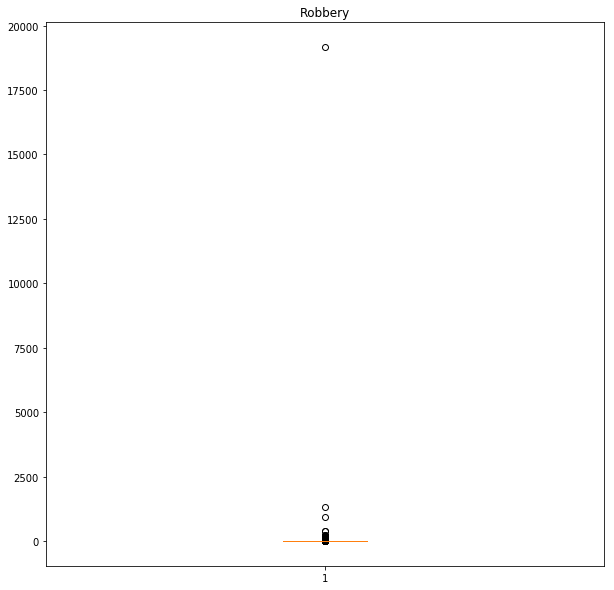

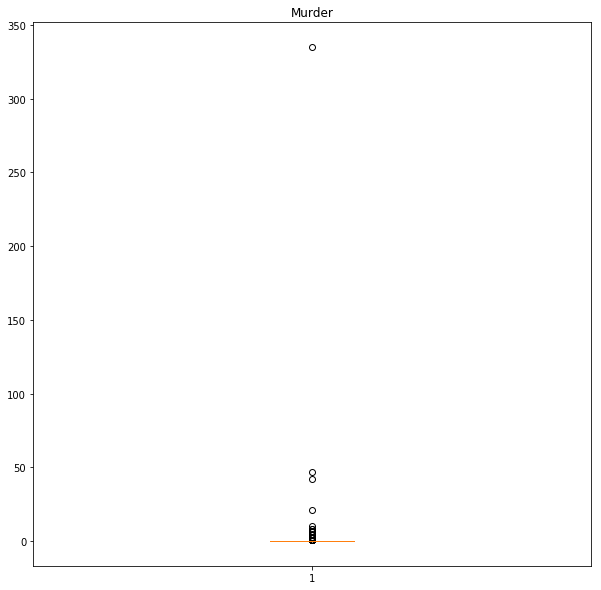

In [211]:
rob=df['Robbery']

plt.figure(figsize=(10, 10))
plt.boxplot(rob)
plt.title('Robbery')
plt.show()

murder=df['Murder and nonnegligent manslaughter']
plt.figure(figsize=(10, 10))
plt.boxplot(murder)
plt.title('Murder')
plt.show()

40037.63218390805


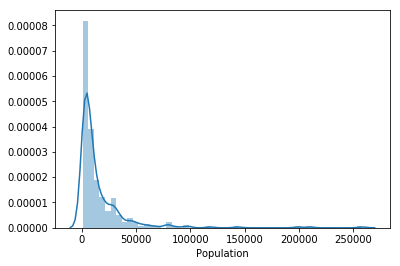

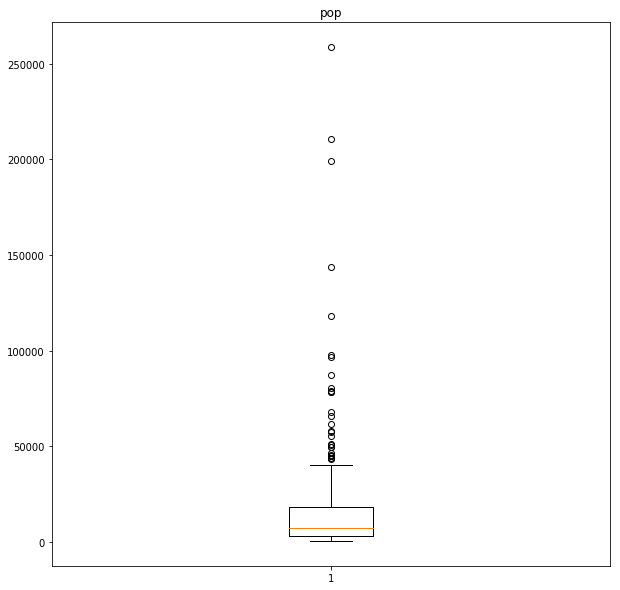

In [212]:
ave=df['Population'].mean()
most=df['Population'].max()
#print(most)

df.loc[df['Population'] == most]=ave


print(ave)
pop=df['Population']
sns.distplot(pop);
plt.figure(figsize=(10, 10))
plt.boxplot(pop)
plt.title('pop')

plt.show()

In [214]:
square=df['Population']**2
df['Population Squared']=square


In [215]:
count=0
rob=rob*1
for num in rob:
    if num > 0:
     rob[count]=1
    count +=1
df['rob']=rob

count=0
murder=murder*1
for num in murder:
    if num > 0:
     murder[count]=1
    count +=1
df['murder']=murder
     


In [216]:
df.head(200)


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Population Squared,rob,murder
0,Adams Village,1861.0,0,0.0,NaN,0,0.0,0,12,2,10,0,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3,0.0,NaN,0,0.0,3,24,3,20,1,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3,0.0,NaN,0,0.0,3,16,1,15,0,0.0,8.099716e+06,0,0
3,Albany,97956.0,791,8.0,NaN,30,227.0,526,"4,090",705,"3,243",142,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23,0.0,NaN,3,4.0,16,223,53,165,5,NaN,4.080654e+07,1,0
5,Alfred Village,4089.0,5,0.0,NaN,0,3.0,2,46,10,36,0,NaN,1.671992e+07,1,0
6,Allegany Village,1781.0,3,0.0,NaN,0,0.0,3,10,0,10,0,0.0,3.171961e+06,0,0
7,Amherst Town,118296.0,107,1.0,NaN,7,31.0,68,"2,118",204,"1,882",32,3.0,1.399394e+10,1,1
8,Amityville Village,9519.0,9,0.0,NaN,2,4.0,3,210,16,188,6,1.0,9.061136e+07,1,0
9,Amsterdam,18182.0,30,0.0,NaN,0,12.0,18,405,99,291,15,0.0,3.305851e+08,1,0
